In [59]:

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras import Sequential



from sklearn.datasets import make_blobs
np.set_printoptions(suppress = True)
warnings.filterwarnings('ignore')




In [60]:
label = {0:'Dog',1:'Cat',2:'Bird',3:'Whale',4:'Fox'}
num_class = 5
x , y = make_blobs(n_samples=1000,
                  centers=num_class,
                  n_features=2,
                  cluster_std=2.5,
                  random_state=10)

df = pd.DataFrame(x , columns=['width','height'])
df['class'] = y
df['class'] = df['class'].map(label)

X = df.drop(columns=['class'])
y , class_name = pd.factorize(df['class'])

X = StandardScaler().fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25)

In [61]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(64 , activation='relu'))
model.add(Dense(num_class , activation='softmax'))

call_back = EarlyStopping(patience=10)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train , y_train , epochs=1000 , verbose=0 , validation_split=0.25 , callbacks=[call_back])



In [62]:
loss , accuracy = model.evaluate(X_test , y_test)
print('Accuracy:',accuracy)
print('Loss:',loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9148 - loss: 0.2084
Accuracy: 0.9279999732971191
Loss: 0.20453333854675293


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


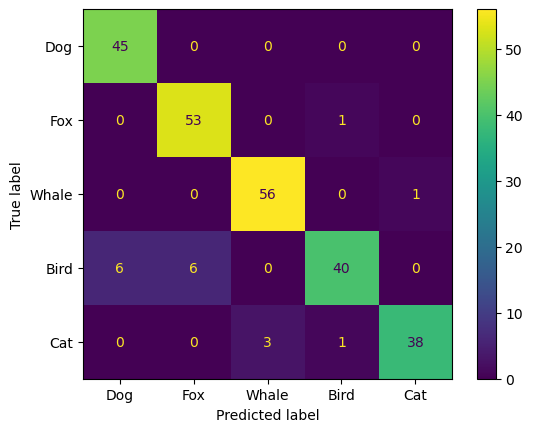

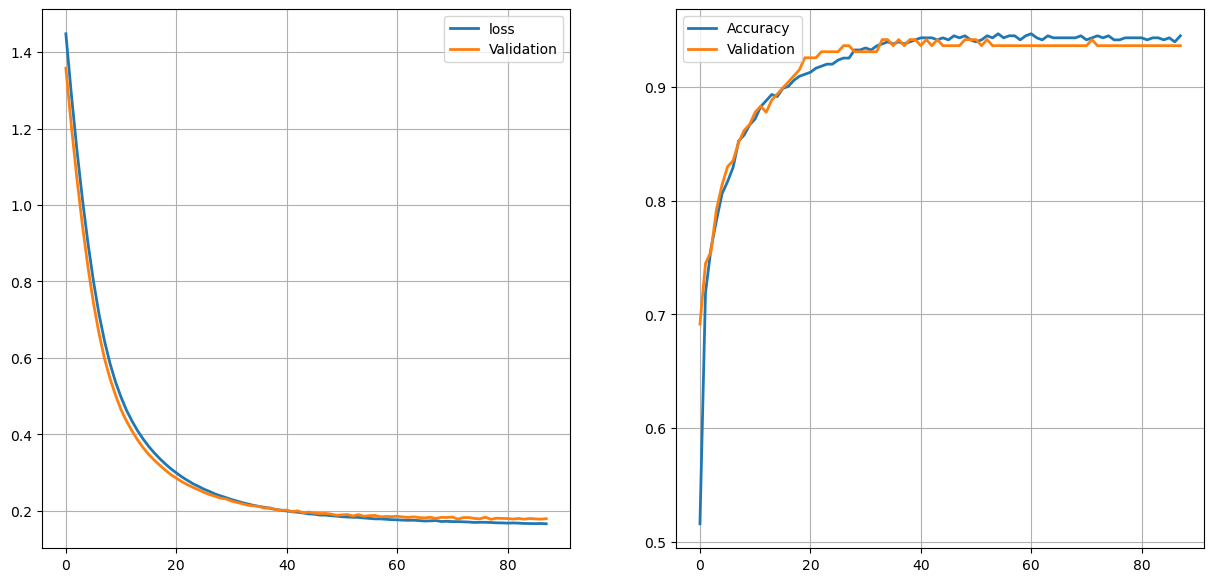

In [64]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob , axis=1)

ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred) , display_labels=class_name).plot()

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'] , lw='2' , label='loss')
plt.plot(history.history['val_loss'] , lw='2' , label='Validation')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'] , lw='2' , label='Accuracy')
plt.plot(history.history['val_accuracy'] , lw='2' , label='Validation')
plt.grid()
plt.legend()
plt.show()
